#### Importing necessary packages:

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import geopandas as gpd
plt.style.use('ggplot')
from pandas.api.types import CategoricalDtype
sns.set(rc={'figure.figsize':(12,7)})

#### Reading CSV file and managing nonrelevant/reordering columns:

In [2]:
df = pd.read_csv(r'rideshare_kaggle.csv')

In [3]:
# Dropping non relevant columns
df = df.drop(['timezone', 'apparentTemperature', 'long_summary', 'humidity', 'windGustTime', 'temperatureHighTime',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime', 'sunriseTime', 'sunsetTime', 'temperatureMin', 'temperatureMax', 'timestamp'], axis = 1)

In [4]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'cloudCover', 'uvIndex'],
      dtype='object')

### Cleaning Data - Finding null values and deleting them:

In [5]:
df.isnull().any(axis=0)

id                   False
hour                 False
day                  False
month                False
datetime             False
source               False
destination          False
cab_type             False
product_id           False
name                 False
price                 True
distance             False
surge_multiplier     False
latitude             False
longitude            False
temperature          False
short_summary        False
precipIntensity      False
precipProbability    False
windSpeed            False
windGust             False
visibility           False
temperatureHigh      False
temperatureLow       False
cloudCover           False
uvIndex              False
dtype: bool

In [6]:
df['price'].isnull().value_counts()

False    637976
True      55095
Name: price, dtype: int64

In [7]:
# Drop all rows with null values (have sufficient data points)
df = df.dropna(axis=0, how = 'any')

In [8]:
df.index = range(0, 637976)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 637976 non-null  object 
 1   hour               637976 non-null  int64  
 2   day                637976 non-null  int64  
 3   month              637976 non-null  int64  
 4   datetime           637976 non-null  object 
 5   source             637976 non-null  object 
 6   destination        637976 non-null  object 
 7   cab_type           637976 non-null  object 
 8   product_id         637976 non-null  object 
 9   name               637976 non-null  object 
 10  price              637976 non-null  float64
 11  distance           637976 non-null  float64
 12  surge_multiplier   637976 non-null  float64
 13  latitude           637976 non-null  float64
 14  longitude          637976 non-null  float64
 15  temperature        637976 non-null  float64
 16  sh

In [10]:
# Converting datetime col to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0        2018-12-16 09:30:07
1        2018-11-27 02:00:23
2        2018-11-28 01:00:22
3        2018-11-30 04:53:02
4        2018-11-29 03:49:20
                 ...        
637971   2018-12-01 23:53:05
637972   2018-12-01 23:53:05
637973   2018-12-01 23:53:05
637974   2018-12-01 23:53:05
637975   2018-12-01 23:53:05
Name: datetime, Length: 637976, dtype: datetime64[ns]

In [11]:
# Creating a new column - weekday
df['weekday'] = df['datetime'].apply(lambda x: x.day_name())
df['weekday']

0            Sunday
1           Tuesday
2         Wednesday
3            Friday
4          Thursday
            ...    
637971     Saturday
637972     Saturday
637973     Saturday
637974     Saturday
637975     Saturday
Name: weekday, Length: 637976, dtype: object

In [12]:
# Creating new column 'time of day' from hour column outlining the various times of day
df['time of day'] = df['hour'].apply(lambda row: 'Morning' if row >= 5 and row <9 else 'Mid Morning' if row >= 9 and row <13 else 'Afternoon' if row >= 13 and row <17 else 'Evening' if row >=17 and row <21 else 'Night' if (row >=21 and row<=23) or (row >=0 and row<=1) else "Late Night")

In [13]:
# Creating new column - price per distance ($/mile)
df['price_per'] = df['price']/df['distance']

In [14]:
# Creating a new column - date
df['date'] = df['datetime'].apply(lambda x: x.date())
df['date']

0         2018-12-16
1         2018-11-27
2         2018-11-28
3         2018-11-30
4         2018-11-29
             ...    
637971    2018-12-01
637972    2018-12-01
637973    2018-12-01
637974    2018-12-01
637975    2018-12-01
Name: date, Length: 637976, dtype: object

In [15]:
# Surge multiplier considered - Price/Surge multiplier
df['price_surge_adjusted'] = df['price']/df['surge_multiplier']

In [16]:
# Surge multiplier considered - Price_per/Surge multiplier
df['price_per_surge_adjusted'] = df['price_per']/df['surge_multiplier']

In [17]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'cloudCover', 'uvIndex', 'weekday', 'time of day', 'price_per', 'date',
       'price_surge_adjusted', 'price_per_surge_adjusted'],
      dtype='object')

In [18]:
# Reordering columns
df = df[['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday', 'time of day', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'price_surge_adjusted', 'distance',
       'price_per', 'price_per_surge_adjusted', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'short_summary', 'precipIntensity',
       'precipProbability', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'cloudCover', 'uvIndex']]

In [19]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'destination', 'cab_type', 'product_id',
       'name', 'price', 'price_surge_adjusted', 'distance', 'price_per',
       'price_per_surge_adjusted', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'precipIntensity', 'precipProbability',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'cloudCover', 'uvIndex'],
      dtype='object')

In [99]:
# Initializing Uber only data table
df_uber = df[df['cab_type']=='Uber']

In [100]:
df_uber.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'destination', 'cab_type', 'product_id',
       'name', 'price', 'price_surge_adjusted', 'distance', 'price_per',
       'price_per_surge_adjusted', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'precipIntensity', 'precipProbability',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'cloudCover', 'uvIndex'],
      dtype='object')

In [102]:
# Initializing Lyft only data table
df_lyft = df[df['cab_type']=='Lyft']

In [103]:
df_lyft.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'destination', 'cab_type', 'product_id',
       'name', 'price', 'price_surge_adjusted', 'distance', 'price_per',
       'price_per_surge_adjusted', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'precipIntensity', 'precipProbability',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'cloudCover', 'uvIndex'],
      dtype='object')

In [110]:
df['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

#### DataFrame logistics:

In [24]:
# Highlights the time span of all the data points collected (~23 days)
fst = df['datetime'].min()
lst = df['datetime'].max()
print(fst)
print(lst)
lst-fst

2018-11-26 03:40:46
2018-12-18 19:15:10


Timedelta('22 days 15:34:24')

In [115]:
df.groupby('cab_type').count()['id']

cab_type
Lyft    307408
Uber    330568
Name: id, dtype: int64

# Analysis Section

### Original Analysis - Ride Distribution 

In [25]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'destination', 'cab_type', 'product_id',
       'name', 'price', 'price_surge_adjusted', 'distance', 'price_per',
       'price_per_surge_adjusted', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'precipIntensity', 'precipProbability',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'cloudCover', 'uvIndex'],
      dtype='object')

In [26]:
# Uber - groupby for ride count per day
by_date_uber = df_uber.groupby('date').count()[['id']]

# Lyft - groupby for ride count per day
by_date_lyft = df_lyft.groupby('date').count()[['id']]

In [27]:
by_date_both = pd.merge(by_date_uber, by_date_lyft, left_index=True, right_index=True)
by_date_both.columns = ['Uber', 'Lyft']

<AxesSubplot:xlabel='Date', ylabel='Numder of Rides'>

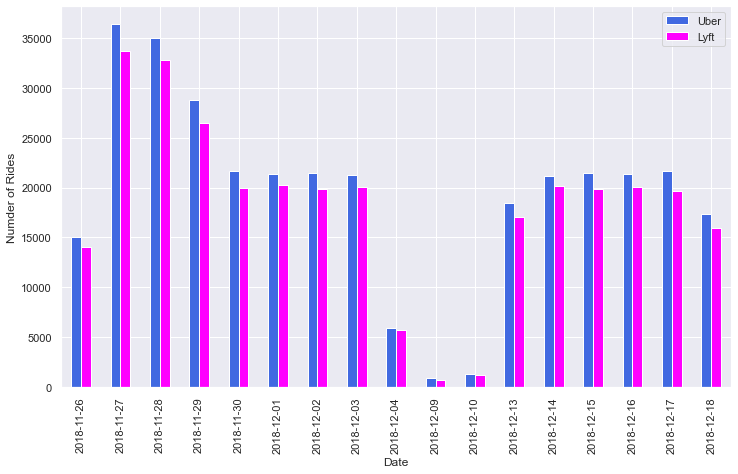

In [28]:
# Number of rides per day over the course of the ~23 day period
by_date_both.plot(kind='bar', color=['royalblue', 'magenta'], xlabel = 'Date', ylabel='Numder of Rides')


In [29]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'destination', 'cab_type', 'product_id',
       'name', 'price', 'price_surge_adjusted', 'distance', 'price_per',
       'price_per_surge_adjusted', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'precipIntensity', 'precipProbability',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'cloudCover', 'uvIndex'],
      dtype='object')

### Price Analysis

/Users/benburkey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


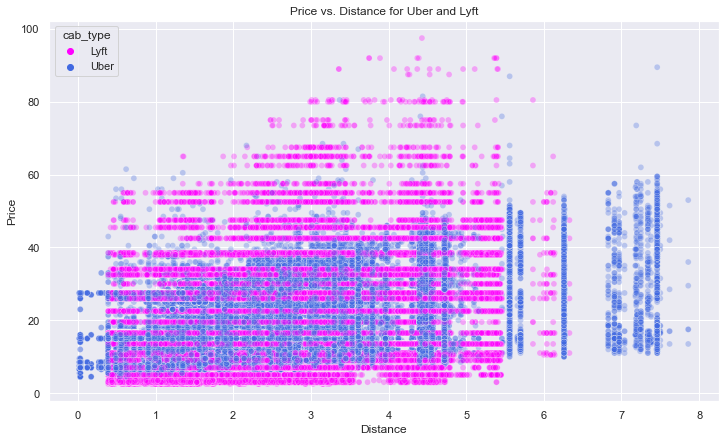

In [118]:
# General plot of price vs. distance w/ a hue for cab_type
time_of_day = df.groupby(['hour']).agg({'price_per':'mean'})
sns.scatterplot(df['distance'], df['price'], hue=df['cab_type'], alpha=0.3, palette = ['magenta', 'royalblue'])
plt.xlabel("Distance")
plt.ylabel("Price")
plt.title("Price vs. Distance for Uber and Lyft")

plt.savefig('plot.png', dpi=300, bbox_inches='tight')

### Distance

In [31]:
# Mean does not tell the whole story
df.groupby(['cab_type']).agg({'distance': ['mean', 'median', 'std']})

distance                 
              mean median       std
cab_type                           
Lyft      2.186976   2.14  1.086622
Uber      2.191386   2.17  1.178973

Text(0.5, 1.0, 'Uber vs. Lyft Box Plot - Distance')

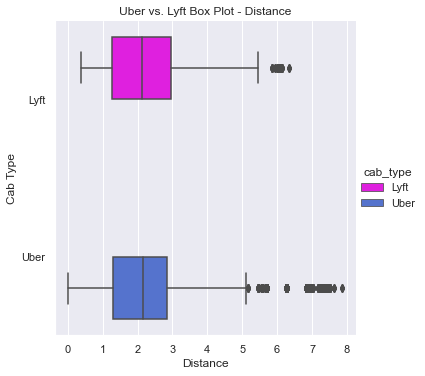

In [32]:
sns.catplot(x='distance', y="cab_type", kind="box", data=df, hue='cab_type', palette = ['magenta', 'royalblue'], orient='h')
plt.xlabel("Distance")
plt.ylabel("Cab Type")
plt.title("Uber vs. Lyft Box Plot - Distance")


Text(0.5, 1.0, 'Uber vs. Lyft Density Plot - Distance')

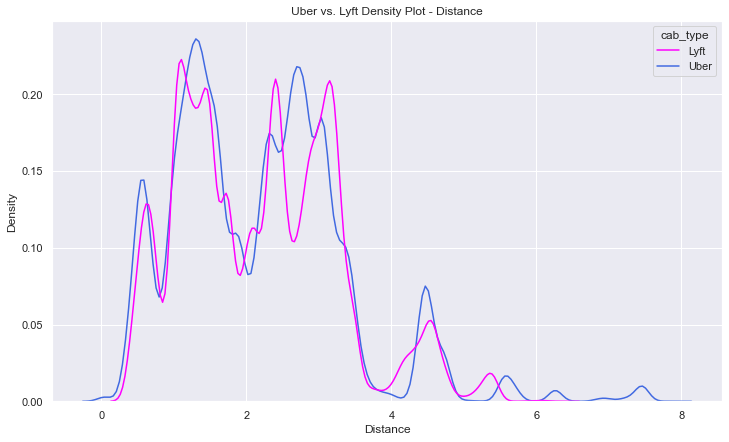

In [33]:
sns.kdeplot(data=df, x='distance', hue='cab_type', palette = ['magenta', 'royalblue'])
plt.xlabel("Distance")
plt.title("Uber vs. Lyft Density Plot - Distance")

### Price

In [34]:
# Difference in pricing more apparent in mean calculation
df.groupby(['cab_type']).agg({'price': ['mean', 'median', 'std']})

price                  
               mean median        std
cab_type                             
Lyft      17.351396   16.5  10.019171
Uber      15.795343   12.5   8.560300

Text(0.5, 1.0, 'Uber vs. Lyft Box Plot - Price')

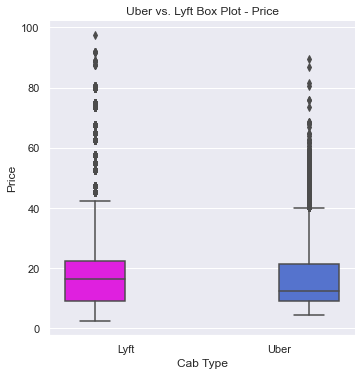

In [35]:
sns.catplot(x='cab_type', y="price", kind="box", data=df, hue='cab_type', palette = ['magenta', 'royalblue'])
plt.xlabel("Cab Type")
plt.ylabel("Price")
plt.title("Uber vs. Lyft Box Plot - Price")

Text(0.5, 1.0, 'Uber vs. Lyft Density Plot - Price')

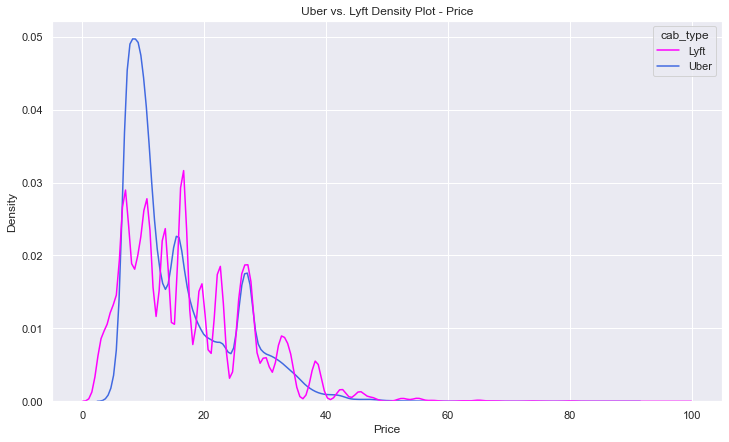

In [36]:
sns.kdeplot(data=df, x='price', hue='cab_type', palette = ['magenta', 'royalblue'])
plt.xlabel("Price")
plt.title("Uber vs. Lyft Density Plot - Price")

## Analysis of time/date vs. PPD (Price per Distance):

In [37]:
# Created sub dataframe w/ day number to be able to sort for seaborn line plots
df_weekday = df[['datetime', 'weekday', 'price_per', 'cab_type', 'price_per_surge_adjusted']]
df_weekday['day_number'] = df_weekday['datetime'].apply(lambda x: x.weekday())
df_weekday_sort = df_weekday.sort_values(by='day_number')

<ipython-input-37-5b7178144446>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekday['day_number'] = df_weekday['datetime'].apply(lambda x: x.weekday())


Text(0.5, 1.0, 'Uber vs. Lyft - Day of the Week (MEAN PPD)')

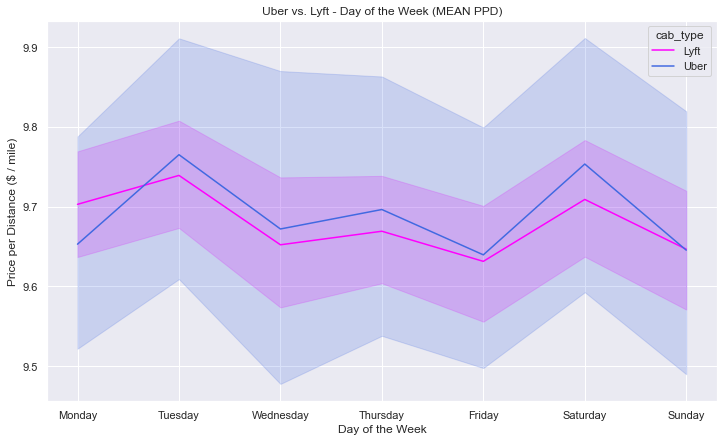

In [38]:
sns.lineplot(data=df_weekday_sort, x='weekday', y='price_per', hue='cab_type', palette = ['magenta', 'royalblue'])
plt.xlabel("Day of the Week")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Day of the Week (MEAN PPD)")

Text(0.5, 1.0, 'Uber vs. Lyft - Day of the Week (MEDIAN PPD)')

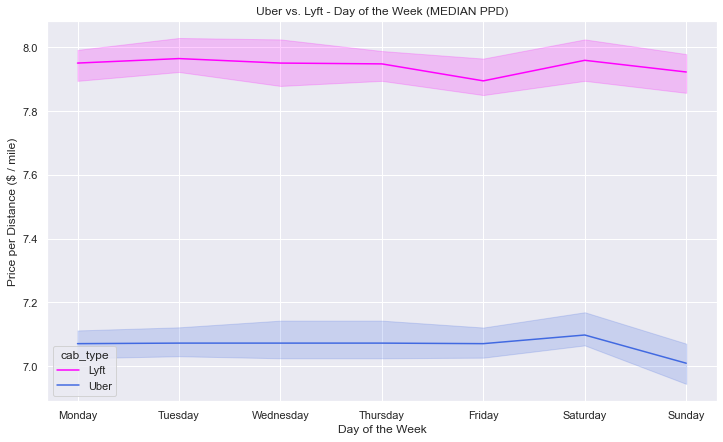

In [39]:
# Checking weekday vs. price per distance using MEDIAN estimator
sns.lineplot(data=df_weekday_sort, x='weekday', y='price_per', hue='cab_type', palette = ['magenta', 'royalblue'], estimator=np.median)
plt.xlabel("Day of the Week")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Day of the Week (MEDIAN PPD)")

In [40]:
# Total count of rides per hour, avg. surge multiplier each hour, avg. distance per hour, avg. price per distance per hour
time_of_day = df.groupby(['hour']).agg({'id':'size', 'surge_multiplier':'mean', 'distance':'mean', 'price_per':'mean'})
time_of_day

,id,surge_multiplier,distance,price_per
hour,,,,
0,29872,1.015449,2.186149,9.726170
1,26310,1.015317,2.180502,9.663340
2,26323,1.015652,2.192988,9.688609
3,25530,1.014835,2.188440,9.635379
4,26125,1.014526,2.178671,9.628231
5,22995,1.014873,2.179677,9.889194
6,25147,1.014515,2.189237,9.810561
7,22930,1.013945,2.174980,9.550098
8,22337,1.014908,2.199121,9.699164


In [41]:
# Created sub dataframe w/ ordered times of day to be able to sort for seaborn line plots
order_dict = {'Morning':0, 'Mid Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late Night':5}
df_time_of_day = df[['time of day', 'price_per', 'cab_type']]
df_time_of_day_sort = df_time_of_day.sort_values(by='time of day', key=lambda x: x.map(order_dict))

Text(0.5, 1.0, 'Uber vs. Lyft - Time of Day (MEAN PPD)')

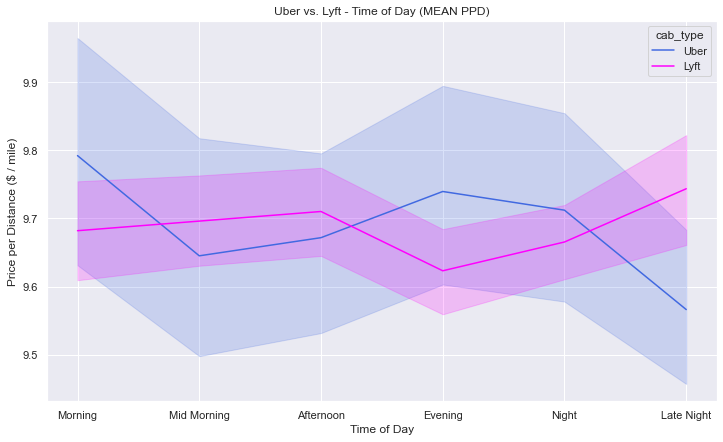

In [42]:
# Plot of Time of Day vs. Price per Distance
sns.lineplot(data=df_time_of_day_sort, x='time of day', y='price_per', hue='cab_type', palette = ['royalblue', 'magenta'])
plt.xlabel("Time of Day")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Time of Day (MEAN PPD)")


Text(0.5, 1.0, 'Uber vs. Lyft - Time of Day (MEDIAN PPD)')

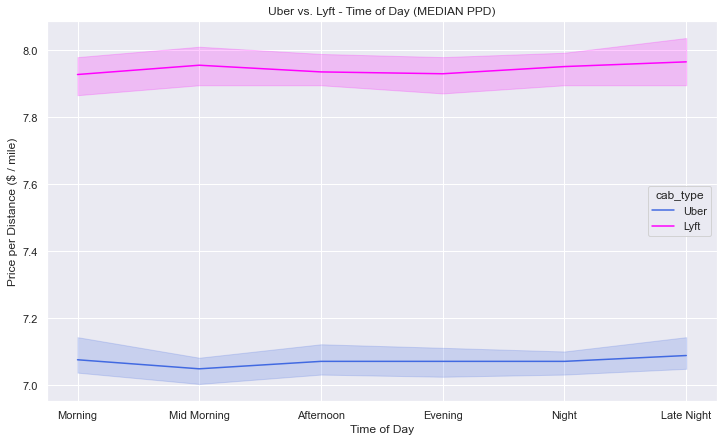

In [43]:
sns.lineplot(data=df_time_of_day_sort, x='time of day', y='price_per', hue='cab_type', palette = ['royalblue', 'magenta'], estimator=np.median)
plt.xlabel("Time of Day")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Time of Day (MEDIAN PPD)")

In [44]:
df.groupby(['cab_type', 'time of day']).agg({'price_per':['mean', 'median', 'std','min', 'max']})

price_per                                            
                          mean    median        std       min          max
cab_type time of day                                                      
Lyft     Afternoon    9.710173  7.934600   7.645609  0.556586   109.375000
         Evening      9.623090  7.929104   7.428408  0.556586   108.333333
         Late Night   9.743585  7.964602   7.691428  0.635593   114.130435
         Mid Morning  9.696064  7.954545   7.626943  0.649351    94.827586
         Morning      9.681960  7.926829   7.585001  0.642398    98.913043
         Night        9.665381  7.950530   7.515565  0.634249   114.130435
Uber     Afternoon    9.671725  7.070707  16.393437  1.474531  1375.000000
         Evening      9.739554  7.070707  17.752696  1.474531  1375.000000
         Late Night   9.566126  7.088123  12.137822  1.498638   687.500000
         Mid Morning  9.645065  7.048458  19.538836  1.474531  1375.000000
         Morning      9.792259  7.075472  19.437468  1.541555  1375.000000
         Night        9.712099  7.070707  18.025592  1.474531  1375.000000

Text(0.5, 1.0, 'Uber vs. Lyft - Hour of the Day (MEAN PPD)')

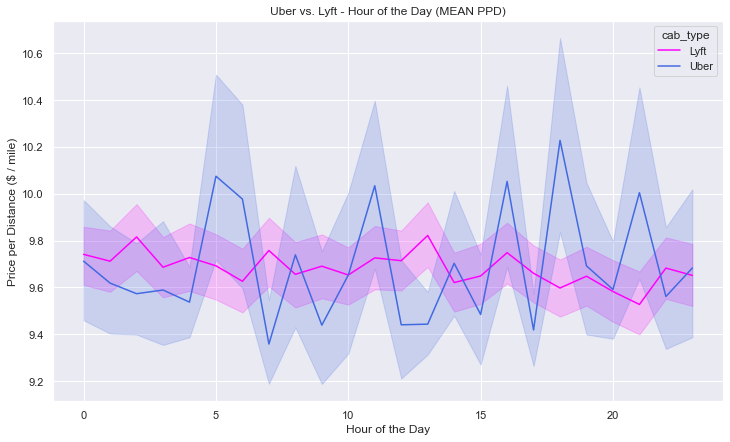

In [45]:
# Plot of specific Hours of the Day vs. Price per Distance
sns.lineplot(data=df, x='hour', y='price_per', hue='cab_type', palette = ['magenta', 'royalblue'])
plt.xlabel("Hour of the Day")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Hour of the Day (MEAN PPD)")

Text(0.5, 1.0, 'Uber vs. Lyft - Hour of the Day (MEDIAN PPD)')

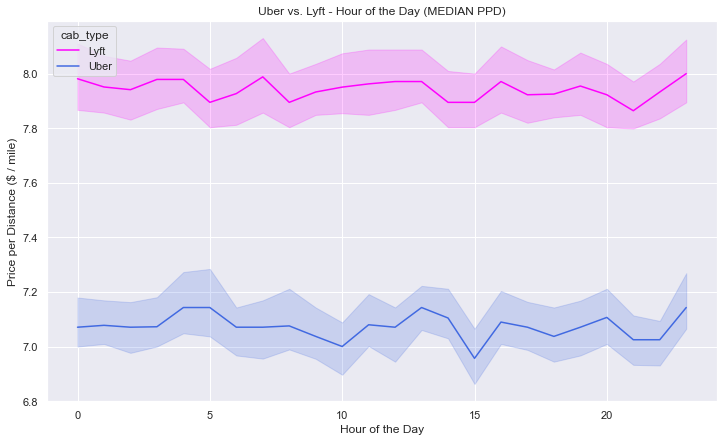

In [46]:
sns.lineplot(data=df, x='hour', y='price_per', hue='cab_type', palette = ['magenta', 'royalblue'], estimator=np.median)
plt.xlabel("Hour of the Day")
plt.ylabel("Price per Distance ($ / mile)")
plt.title("Uber vs. Lyft - Hour of the Day (MEDIAN PPD)")

## Analysis of pick-up /drop-off locations:

In [47]:
loc_source_dest_count = df_lyft.groupby(['source', 'destination']).count()[['id']]
loc_source_dest_count

id
source   destination                  
Back Bay Boston University        4164
         Fenway                   4212
         Haymarket Square         4236
         North End                4548
         Northeastern University  4271
...                                ...
West End Fenway                   4530
         Haymarket Square         4032
         North End                4110
         Northeastern University  4224
         South Station            4200

[72 rows x 1 columns]

Text(0.5, 1.0, 'Number of Lyft Rides: Source - Back Bay')

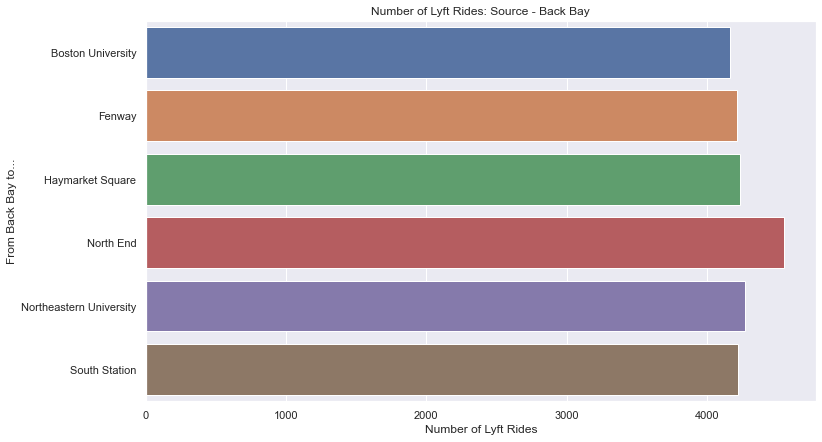

In [48]:
# Amount of LYFT rides originating from Back Bay
back_bay_count = sns.barplot(x='id', y=loc_source_dest_count.loc[('Back Bay')].index, data=loc_source_dest_count.loc[('Back Bay')])
back_bay_count.set_xlabel('Number of Lyft Rides')
back_bay_count.set_ylabel('From Back Bay to...')
back_bay_count.set_title('Number of Lyft Rides: Source - Back Bay')


Text(0.5, 1.0, 'Number of Lyft Rides: Source - Beacon Hill')

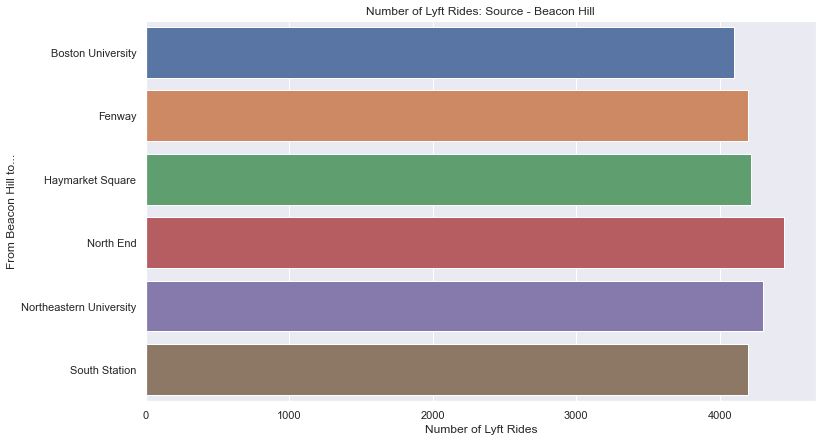

In [49]:
# Amount of LYFT rides originating from Beacon Hill
beacon_hill_count = sns.barplot(x='id', y=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Beacon Hill')].index, data=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Beacon Hill')])
beacon_hill_count.set_xlabel('Number of Lyft Rides')
beacon_hill_count.set_ylabel('From Beacon Hill to...')
beacon_hill_count.set_title('Number of Lyft Rides: Source - Beacon Hill')

Text(0.5, 1.0, 'Number of Lyft Rides: Source - Boston University')

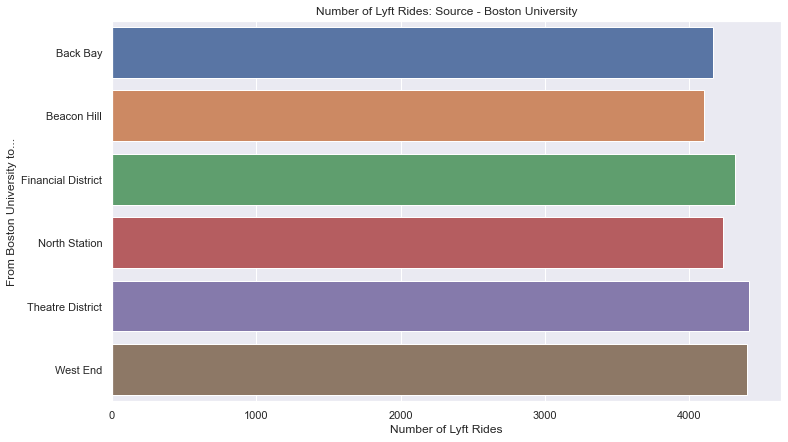

In [50]:
# Amount of LYFT rides originating from Boston University
boston_university_count = sns.barplot(x='id', y=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Boston University')].index, data=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Boston University')])
boston_university_count.set_xlabel('Number of Lyft Rides')
boston_university_count.set_ylabel('From Boston University to...')
boston_university_count.set_title('Number of Lyft Rides: Source - Boston University')

Text(0.5, 1.0, 'Number of Lyft Rides: Source - Fenway')

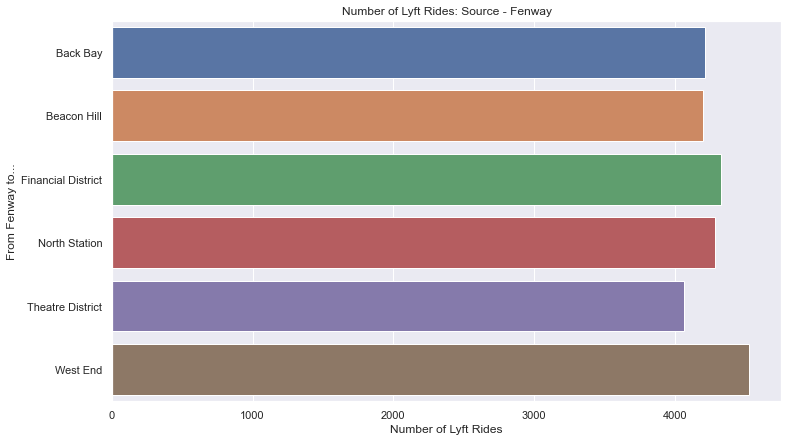

In [51]:
# Amount of LYFT rides originating from Fenway
fenway_count = sns.barplot(x='id', y=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Fenway')].index, data=df_lyft.groupby(['source', 'destination']).count()[['id']].loc[('Fenway')])
fenway_count.set_xlabel('Number of Lyft Rides')
fenway_count.set_ylabel('From Fenway to...')
fenway_count.set_title('Number of Lyft Rides: Source - Fenway')

##### ETC.... (would continue to plot the count of all 12 separate source/pick-up locations and their corresponding destination/drop-off locations)

### Correcting False Latitude/Longitude Coordinates & Reading GeoJSON File

In [52]:
import json
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [53]:
# Finding accurate latitude and longitude coordinates for source/destination neighborhoods originally provided

LOCATOR = RateLimiter(Nominatim(user_agent='myGeoCoder').geocode, min_delay_seconds=1.5)

def get_lat_long(location):
    loc = LOCATOR(location)
    return loc.latitude, loc.longitude

def get_neighborhoods(filename='rideshare_kaggle.csv'):
    data = pd.read_csv(filename)
    neighborhoods = set(np.concatenate([data['source'].unique(), data['destination'].unique()]))
    return pd.DataFrame([
        (nb, *get_lat_long(f'{nb}, Boston, MA')) for nb in neighborhoods
    ], columns=['Neighborhood', 'Latitude', 'Longitude'])

neighborhoods = get_neighborhoods('rideshare_kaggle.csv')
neighborhoods

,Neighborhood,Latitude,Longitude
0,Back Bay,42.350549,-71.080311
1,Boston University,42.350317,-71.101227
2,Financial District,42.355838,-71.055616
3,North Station,42.365282,-71.060150
4,South Station,42.352474,-71.054974
5,Theatre District,42.356258,-71.060798
6,North End,42.365097,-71.054495
7,Beacon Hill,42.358708,-71.067829
8,Northeastern University,42.339030,-71.087913
9,Fenway,42.345187,-71.104599


In [54]:
# Reading geojson file
def load_geo_json(filename='Boston_Neighborhoods.geojson'):
    with open(filename, 'r') as f:
        boston_geo_json = json.loads(f.read())
    return boston_geo_json

In [57]:
# Initializing Boston_Neighborhoods.geojson to boston_geo_json variable 
boston_geo_json = load_geo_json('Boston_Neighborhoods.geojson')
boston_geo_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 27,
    'Name': 'Roslindale',
    'Acres': 1605.5682375,
    'Neighborhood_ID': '15',
    'SqMiles': 2.51,
    'ShapeSTArea': 69938272.92557049,
    'ShapeSTLength': 53563.912597056624},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-71.12592717485386, 42.272013107957406],
       [-71.12610933458738, 42.2716219294518],
       [-71.12603188298199, 42.27158985153841],
       [-71.12571713956957, 42.27152070474045],
       [-71.12559042372907, 42.27146017841939],
       [-71.12523676125656, 42.271387313901805],
       [-71.12522437821433, 42.271425073651166],
       [-71.12489533053173, 42.27134458090032],
       [-71.12482468090687, 42.271318140479686],
       [-71.12485155056099, 42.27124753819149],
       [-71.12476329046935, 42.270292339717635],
       [-71.12470249712558, 42.270295367758344],
       [-71.12259088359436, 42.2700534081311],
       [-71.1223931813923, 42.270030

In [58]:
# Creating polygons constituted by latitude and longitude lines from geo_json file - Boston_Neighborhoods
def create_polygon(shape):
    array = np.array(shape)
    if len(array.shape) == 2:
        return Polygon(shape)
    return Polygon(shape[0])

def create_polygons(neighborhood):
    coords = neighborhood['geometry']['coordinates']
    
    return [create_polygon(shape) for shape in coords]

neighborhood_polygons = {
    neighborhood['properties']['Name']: create_polygons(neighborhood) 
    for neighborhood in boston_geo_json['features']
}

# Regrouping source and destination neighborhood assignment based off new lat/long coordinates
def which_neighborhoods(row):
    point = Point(row['Longitude'], row['Latitude'],)
    for neighborhood, polygons in neighborhood_polygons.items():
        for polygon in polygons:
            if point.within(polygon):
                return neighborhood

In [59]:
neighborhoods['geo_json_neighborhood'] = neighborhoods.apply(which_neighborhoods, axis=1)
neighborhoods

,Neighborhood,Latitude,Longitude,geo_json_neighborhood
0,Back Bay,42.350549,-71.080311,Back Bay
1,Boston University,42.350317,-71.101227,Fenway
2,Financial District,42.355838,-71.055616,Downtown
3,North Station,42.365282,-71.060150,West End
4,South Station,42.352474,-71.054974,Downtown
5,Theatre District,42.356258,-71.060798,Downtown
6,North End,42.365097,-71.054495,North End
7,Beacon Hill,42.358708,-71.067829,Beacon Hill
8,Northeastern University,42.339030,-71.087913,Fenway
9,Fenway,42.345187,-71.104599,Fenway


### Creating New DataFrame for Geo Analysis

In [60]:
# Creating new df for the location analysis (new_source, new_dest and lat/long conversions)
df_geo = df.copy()

In [61]:
df_geo.drop(['latitude', 'longitude', 'temperature', 'short_summary', 'precipIntensity', 'precipProbability', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'cloudCover', 'uvIndex'], axis=1, inplace=True)

In [62]:
# Latitude and Longitude dictionaries for mapping to sources and destinations
lat_dict = {'Financial District': 42.355838, 'South Station':42.352474, 'North End':42.365097, 'Fenway': 42.345187, 'Northeastern University':42.339030, 'West End': 42.363919, 'North Station':42.365282, 'Beacon Hill': 42.358708, 'Theatre District': 42.356258, 'Back Bay': 42.350549, 'Haymarket Square': 42.362950, 'Boston University': 42.350317}
long_dict = {'Financial District': -71.055616, 'South Station':-71.054974, 'North End':-71.054495, 'Fenway': -71.104599, 'Northeastern University':-71.087913, 'West End': -71.063899, 'North Station':-71.060150, 'Beacon Hill': -71.067829, 'Theatre District': -71.060798, 'Back Bay': -71.080311, 'Haymarket Square': -71.057845, 'Boston University': 71.101227}
loc_dict = {'North End':'North End', 'Financial District':'Downtown', 'Theatre District':'Downtown', 'Beacon Hill':'Beacon Hill', 'Northeastern University':'Fenway', 'West End':'West End', 'North Station': 'West End', 'Back Bay':'Back Bay', 'Boston University':'Fenway', 'Haymarket Square':'Downtown', 'South Station':'Downtown', 'Fenway':'Fenway'}
df_geo['updated_source'] = df_geo['source'].map(loc_dict)
df_geo['updated_dest'] = df_geo['destination'].map(loc_dict)
df_geo['source_lat'] = df_geo['source'].map(lat_dict)
df_geo['source_long'] = df_geo['source'].map(long_dict)
df_geo['dest_lat'] = df_geo['destination'].map(lat_dict)
df_geo['dest_long'] = df_geo['destination'].map(long_dict)

In [63]:
df_geo.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'destination', 'cab_type', 'product_id',
       'name', 'price', 'price_surge_adjusted', 'distance', 'price_per',
       'price_per_surge_adjusted', 'surge_multiplier', 'updated_source',
       'updated_dest', 'source_lat', 'source_long', 'dest_lat', 'dest_long'],
      dtype='object')

In [64]:
df_geo = df_geo[['id', 'hour', 'day', 'month', 'datetime', 'date', 'weekday',
       'time of day', 'source', 'updated_source', 'destination', 'updated_dest', 'source_lat', 'source_long', 'dest_lat',
       'dest_long', 'cab_type', 'product_id',
       'name', 'price', 'distance', 'price_per', 'price_per_surge_adjusted',
       'surge_multiplier']]

In [65]:
df_geo['cab_type']

0         Lyft
1         Lyft
2         Lyft
3         Lyft
4         Lyft
          ... 
637971    Uber
637972    Uber
637973    Uber
637974    Uber
637975    Uber
Name: cab_type, Length: 637976, dtype: object

In [66]:
df_geo_uber = df_geo.loc[df_geo['cab_type']=='Uber']
df_geo_lyft = df_geo.loc[df_geo['cab_type']=='Lyft']

In [67]:
updated_source_agg_uber = df_geo_uber.groupby('updated_source').agg({'id':'count', 'price':'mean', 'distance':'mean', 'price_per':'mean', 'price_per_surge_adjusted':'mean'})
updated_source_agg_uber

,id,price,distance,price_per,price_per_surge_adjusted
updated_source,,,,,
Back Bay,27546,15.565962,2.160484,9.682022,9.682022
Beacon Hill,27377,14.979125,2.014316,7.801591,7.801591
Downtown,110704,15.292659,1.898242,12.137247,12.137247
Fenway,82648,17.243079,2.880514,6.832036,6.832036
North End,27551,14.719302,1.572555,10.334937,10.334937
West End,54742,15.691343,2.159339,9.690055,9.690055


In [68]:
updated_source_agg_lyft = df_geo_lyft.groupby('updated_source').agg({'id':'count', 'price':'mean', 'distance':'mean', 'price_per':'mean', 'price_per_surge_adjusted':'mean'})
updated_source_agg_lyft

,id,price,distance,price_per,price_per_surge_adjusted
updated_source,,,,,
Back Bay,25655,16.564312,1.789977,9.877535,9.276206
Beacon Hill,25464,16.400389,2.057853,8.249361,7.941657
Downtown,103001,16.797691,1.960014,11.819155,11.517447
Fenway,76854,19.598288,2.841778,7.258942,6.891380
North End,25620,15.620160,1.651789,10.199195,10.145866
West End,50814,16.822267,2.191648,9.381173,9.261960


In [117]:
bos_nb = 'Boston_Neighborhoods.shx'
map_df = gpd.read_file(bos_nb)

In [73]:
df_merged_uber = map_df.merge(updated_source_agg_uber, left_on=['Name'], right_on=updated_source_agg_uber.index)
df_merged_lyft = map_df.merge(updated_source_agg_lyft, left_on=['Name'], right_on=updated_source_agg_lyft.index)


In [74]:
df_merged_uber

,OBJECTID,Name,Acres,Neighborho,SqMiles,ShapeSTAre,ShapeSTLen,geometry,id,price,distance,price_per,price_per_surge_adjusted
0,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((-71.05200 42.36884, -71.05169 42.368...",27551,14.719302,1.572555,10.334937,10.334937
1,37,Back Bay,399.314411,2,0.62,1.739407e+07,19455.671146,"POLYGON ((-71.07569 42.35692, -71.07579 42.356...",27546,15.565962,2.160484,9.682022,9.682022
2,40,West End,190.490732,31,0.30,8.297743e+06,17728.590027,"MULTIPOLYGON (((-71.06478 42.36882, -71.06467 ...",54742,15.691343,2.159339,9.690055,9.690055
3,41,Beacon Hill,200.156904,30,0.31,8.718800e+06,14303.829017,"POLYGON ((-71.07141 42.36119, -71.07080 42.361...",27377,14.979125,2.014316,7.801591,7.801591
4,42,Downtown,397.472846,7,0.62,1.731385e+07,34612.804441,"POLYGON ((-71.05342 42.36130, -71.05276 42.360...",110704,15.292659,1.898242,12.137247,12.137247
5,43,Fenway,560.618461,34,0.88,2.442044e+07,24620.876452,"POLYGON ((-71.11011 42.35208, -71.10986 42.352...",82648,17.243079,2.880514,6.832036,6.832036


In [75]:
df_merged_lyft

,OBJECTID,Name,Acres,Neighborho,SqMiles,ShapeSTAre,ShapeSTLen,geometry,id,price,distance,price_per,price_per_surge_adjusted
0,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((-71.05200 42.36884, -71.05169 42.368...",25620,15.620160,1.651789,10.199195,10.145866
1,37,Back Bay,399.314411,2,0.62,1.739407e+07,19455.671146,"POLYGON ((-71.07569 42.35692, -71.07579 42.356...",25655,16.564312,1.789977,9.877535,9.276206
2,40,West End,190.490732,31,0.30,8.297743e+06,17728.590027,"MULTIPOLYGON (((-71.06478 42.36882, -71.06467 ...",50814,16.822267,2.191648,9.381173,9.261960
3,41,Beacon Hill,200.156904,30,0.31,8.718800e+06,14303.829017,"POLYGON ((-71.07141 42.36119, -71.07080 42.361...",25464,16.400389,2.057853,8.249361,7.941657
4,42,Downtown,397.472846,7,0.62,1.731385e+07,34612.804441,"POLYGON ((-71.05342 42.36130, -71.05276 42.360...",103001,16.797691,1.960014,11.819155,11.517447
5,43,Fenway,560.618461,34,0.88,2.442044e+07,24620.876452,"POLYGON ((-71.11011 42.35208, -71.10986 42.352...",76854,19.598288,2.841778,7.258942,6.891380


Text(-71.1, 42.345, 'Fenway')

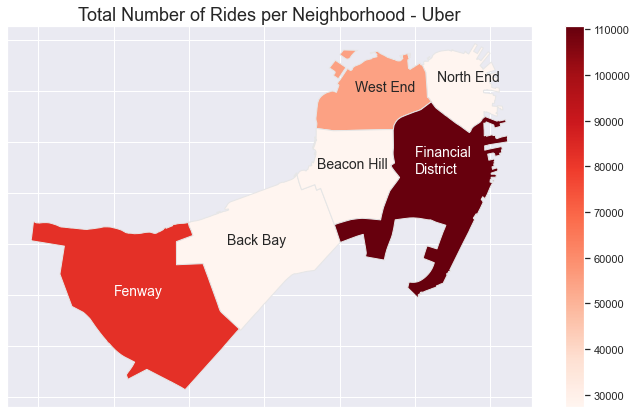

In [76]:
# Choropleth - Total number of rides for Uber per neighborhood
fig, ax = plt.subplots(1, figsize=(12,7))
choro_uber = df_merged_uber.plot(column='id', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.set_title('Total Number of Rides per Neighborhood - Uber', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Financial \nDistrict', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

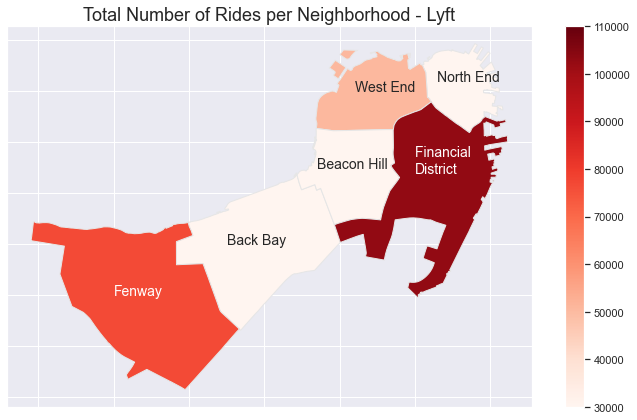

In [77]:
# Choropleth - Total number of rides for Lyft per neighborhood
fig, ax = plt.subplots(1, figsize=(12,7))
choro_lyft = df_merged_lyft.plot(column='id', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=30000, vmax=110000)
ax.set_title('Total Number of Rides per Neighborhood - Lyft', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Financial \nDistrict', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

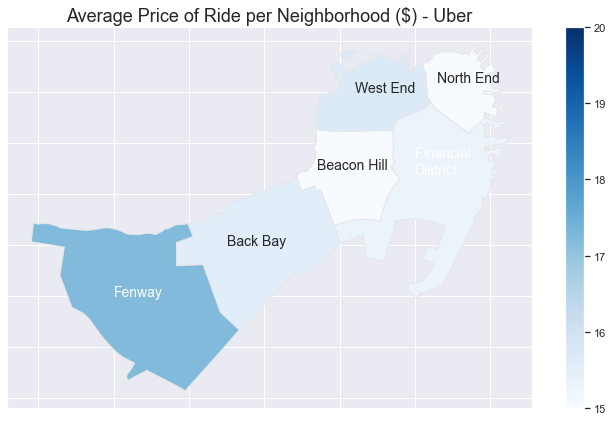

In [98]:
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_uber.plot(column='price', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=15, vmax=20)
ax.set_title('Average Price of Ride per Neighborhood ($) - Uber', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Financial \nDistrict', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

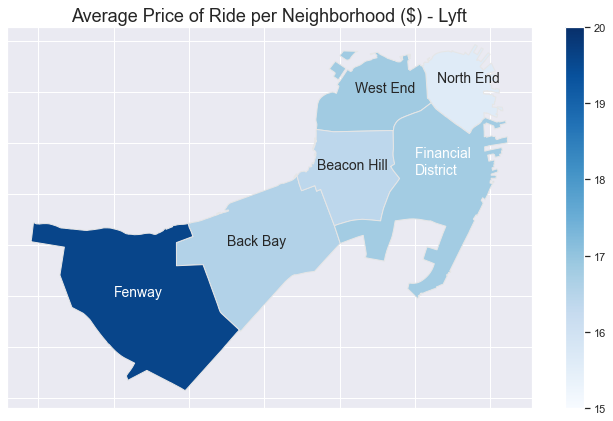

In [97]:
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_lyft.plot(column='price', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=15, vmax=20)
ax.set_title('Average Price of Ride per Neighborhood ($) - Lyft', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Financial \nDistrict', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

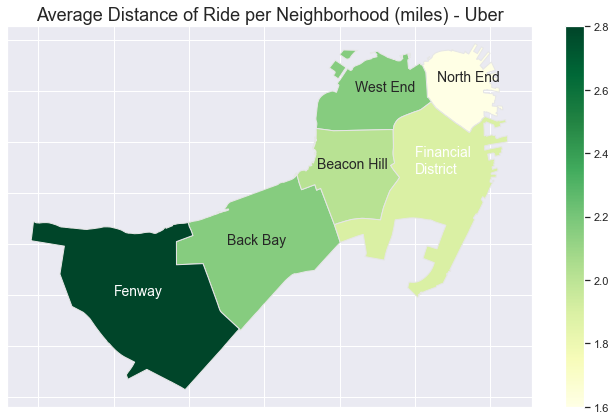

In [96]:
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_uber.plot(column='distance', cmap='YlGn', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=1.6, vmax=2.8)
ax.set_title('Average Distance of Ride per Neighborhood (miles) - Uber', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Financial \nDistrict', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

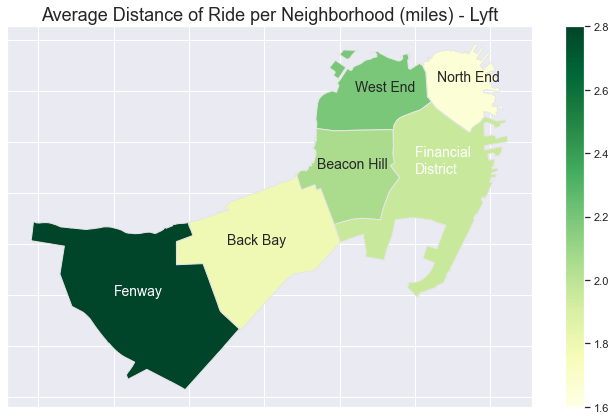

In [93]:
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_lyft.plot(column='distance', cmap='YlGn', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=1.6, vmax=2.8)
ax.set_title('Average Distance of Ride per Neighborhood (miles) - Lyft', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Financial \nDistrict', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

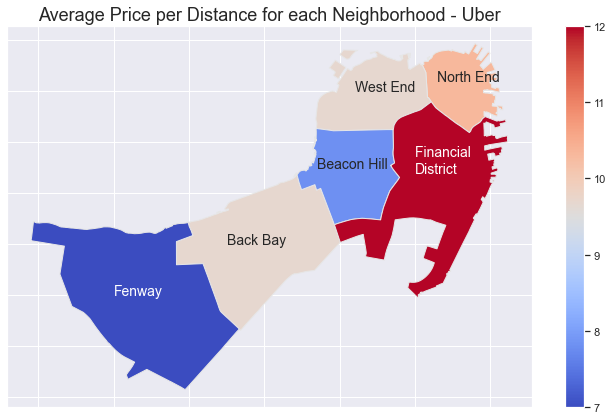

In [82]:
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_uber.plot(column='price_per', cmap='coolwarm', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=7, vmax=12)
ax.set_title('Average Price per Distance for each Neighborhood - Uber', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Financial \nDistrict', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

Text(-71.1, 42.345, 'Fenway')

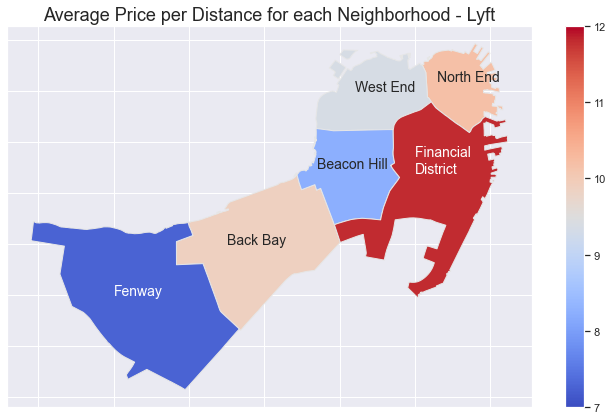

In [83]:
fig, ax = plt.subplots(1, figsize=(12,7))
df_merged_lyft.plot(column='price_per', cmap='coolwarm', linewidth=1, ax=ax, edgecolor='0.9', legend = True, vmin=7, vmax=12)
ax.set_title('Average Price per Distance for each Neighborhood - Lyft', size=18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.annotate('West End', (-71.068, 42.365), size=14)
ax.annotate('North End', (-71.057, 42.366), size=14)
ax.annotate(text='Financial \nDistrict', xy=(-71.06, 42.3570), color='white', size=14)
ax.annotate('Beacon Hill', (-71.073, 42.3575), size=14)
ax.annotate('Back Bay', (-71.085, 42.350), size=14)
ax.annotate('Fenway', (-71.1, 42.345), size=14, color='white')

### Geo Analysis

In [84]:
# Groupby of cab_type - source - destination for multiple ride metrics (surge_multiplier, price, distance, price_per)
loc_source_dest_mean = df.groupby(['cab_type', 'source', 'destination']).agg({'surge_multiplier':'mean', 'price':'mean', 'distance': 'mean', 'price_per': 'mean'})
pd.options.display.max_rows = 150
loc_source_dest_mean

surge_multiplier  \
cab_type source                  destination                                 
Lyft     Back Bay                Boston University                1.066703   
                                 Fenway                           1.064103   
                                 Haymarket Square                 1.060611   
                                 North End                        1.058047   
                                 Northeastern University          1.059529   
                                 South Station                    1.054451   
         Beacon Hill             Boston University                1.033126   
                                 Fenway                           1.035417   
                                 Haymarket Square                 1.028153   
                                 North End                        1.041048   
                                 Northeastern University          1.034868   
                                 South Station                    1.039286   
         Boston University       Back Bay                         1.046830   
                                 Beacon Hill                      1.042338   
                                 Financial District               1.049606   
                                 North Station                    1.044740   
                                 Theatre District                 1.047271   
                                 West End                         1.042633   
         Fenway                  Back Bay                         1.053656   
                                 Beacon Hill                      1.046726   
                                 Financial District               1.051318   
                                 North Station                    1.046043   
                                 Theatre District                 1.049963   
                                 West End                         1.040784   
         Financial District      Boston University                1.028396   
                                 Fenway                           1.028837   
                                 Haymarket Square                 1.025527   
                                 North End                        1.023784   
                                 Northeastern University          1.024281   
                                 South Station                    1.019725   
         Haymarket Square        Back Bay                         1.005902   
                                 Beacon Hill                      1.001482   
                                 Financial District               1.005826   
                                 North Station                    1.004926   
                                 Theatre District                 1.004933   
                                 West End                         1.006510   
         North End               Back Bay                         1.003298   
                                 Beacon Hill                      1.005342   
                                 Financial District               1.006322   
                                 North Station                    1.005365   
                                 Theatre District                 1.004796   
                                 West End                         1.004258   
         North Station           Boston University                1.011525   
                                 Fenway                           1.006419   
                                 Haymarket Square                 1.011300   
                                 North End                        1.011624   
                                 Northeastern University          1.014398   
                                 South Station                    1.012037   
         Northeastern University Back Bay                         1.047410   
                                 Beacon Hill                      1.042132   
  

In [85]:
# Subset of the table above - only including source (destination not included)
loc_source_tot = df.groupby(['cab_type', 'source']).agg({'surge_multiplier':'mean', 'price':'mean', 'distance': 'mean', 'price_per': 'mean'})
loc_source_tot

surge_multiplier      price  distance  \
cab_type source                                                           
Lyft     Back Bay                         1.060524  16.564312  1.789977   
         Beacon Hill                      1.035373  16.400389  2.057853   
         Boston University                1.045589  20.084387  3.060895   
         Fenway                           1.047990  19.688681  2.824319   
         Financial District               1.025041  18.794100  2.621228   
         Haymarket Square                 1.004929  13.740825  1.159475   
         North End                        1.004879  15.620160  1.651789   
         North Station                    1.011204  16.959528  2.253310   
         Northeastern University          1.048411  19.021662  2.640075   
         South Station                    1.028659  16.304859  1.785311   
         Theatre District                 1.050304  18.307489  2.258982   
         West End                         1.012212  16.685880  2.130379   
Uber     Back Bay                         1.000000  15.565962  2.160484   
         Beacon Hill                      1.000000  14.979125  2.014316   
         Boston University                1.000000  17.708025  3.042099   
         Fenway                           1.000000  17.161838  2.799614   
         Financial District               1.000000  17.606402  2.790039   
         Haymarket Square                 1.000000  13.426742  1.083833   
         North End                        1.000000  14.719302  1.572555   
         North Station                    1.000000  15.810532  2.186821   
         Northeastern University          1.000000  16.859328  2.799805   
         South Station                    1.000000  15.084187  1.894854   
         Theatre District                 1.000000  15.018846  1.810849   
         West End                         1.000000  15.573203  2.132100   

                                  price_per  
cab_type source                              
Lyft     Back Bay                  9.877535  
         Beacon Hill               8.249361  
         Boston University         6.853650  
         Fenway                    7.304401  
         Financial District       11.762057  
         Haymarket Square         14.164213  
         North End                10.199195  
         North Station             9.380179  
         Northeastern University   7.618860  
         South Station            11.109409  
         Theatre District         10.237309  
         West End                  9.382162  
Uber     Back Bay                  9.682022  
         Beacon Hill               7.801591  
         Boston University         7.585633  
         Fenway                    6.470037  
         Financial District       11.515146  
         Haymarket Square         15.400168  
         North End                10.334937  
         North Station             9.808514  
         Northeastern University   6.440332  
         South Station            10.713576  
         Theatre District         10.936127  
         West End                  9.572639

In [86]:
# Subset of the table above - only including destination (source not included)
loc_dest_tot = df.groupby(['cab_type', 'destination']).agg({'surge_multiplier':'mean', 'price':'mean', 'distance': 'mean', 'price_per': 'mean'})
loc_dest_tot

surge_multiplier      price  distance  \
cab_type destination                                                      
Lyft     Back Bay                         1.031014  16.890019  2.070327   
         Beacon Hill                      1.027902  16.881598  2.194460   
         Boston University                1.034171  20.318453  3.175472   
         Fenway                           1.032143  19.392857  2.947609   
         Financial District               1.030957  18.995274  2.525150   
         Haymarket Square                 1.031966  14.665053  1.341917   
         North End                        1.033175  15.583216  1.618192   
         North Station                    1.030838  17.769387  2.255880   
         Northeastern University          1.031451  18.747821  2.620630   
         South Station                    1.031879  15.047925  1.417773   
         Theatre District                 1.030565  16.808839  1.951278   
         West End                         1.029154  17.075600  2.116599   
Uber     Back Bay                         1.000000  15.576943  2.098669   
         Beacon Hill                      1.000000  15.659300  2.232905   
         Boston University                1.000000  17.662862  2.882274   
         Fenway                           1.000000  16.987131  2.790815   
         Financial District               1.000000  17.155541  2.640674   
         Haymarket Square                 1.000000  13.874955  1.321147   
         North End                        1.000000  14.462033  1.656216   
         North Station                    1.000000  15.909196  2.199167   
         Northeastern University          1.000000  16.971593  2.659277   
         South Station                    1.000000  14.624460  1.793481   
         Theatre District                 1.000000  15.203938  1.900850   
         West End                         1.000000  15.438014  2.115907   

                                  price_per  
cab_type destination                         
Lyft     Back Bay                  8.587297  
         Beacon Hill               8.028860  
         Boston University         6.929165  
         Fenway                    7.006316  
         Financial District       10.811376  
         Haymarket Square         12.302607  
         North End                10.366200  
         North Station            10.676892  
         Northeastern University   7.863221  
         South Station            14.483396  
         Theatre District          9.348251  
         West End                  9.771219  
Uber     Back Bay                  9.161674  
         Beacon Hill               7.734753  
         Boston University         8.123764  
         Fenway                    6.539820  
         Financial District       10.359977  
         Haymarket Square         13.066519  
         North End                 9.886285  
         North Station            10.458470  
         Northeastern University   7.261086  
         South Station            14.482536  
         Theatre District          9.442411  
         West End                  9.770894

In [87]:
# Uber-source data
df_uber_source = df_uber.groupby('source').mean()[['price_per']].sort_values(by='source')
df_uber_source

,price_per
source,
Back Bay,9.682022
Beacon Hill,7.801591
Boston University,7.585633
Fenway,6.470037
Financial District,11.515146
Haymarket Square,15.400168
North End,10.334937
North Station,9.808514
Northeastern University,6.440332


In [88]:
# Lyft-source data
df_lyft_source = df_lyft.groupby('source').mean()[['price_per']].sort_values(by='source')
df_lyft_source

,price_per
source,
Back Bay,9.877535
Beacon Hill,8.249361
Boston University,6.853650
Fenway,7.304401
Financial District,11.762057
Haymarket Square,14.164213
North End,10.199195
North Station,9.380179
Northeastern University,7.618860


In [89]:
# Merged source tables from both Lyft and Uber for plotting purposes
df_source_both = pd.merge(df_uber_source, df_lyft_source, on='source')
df_source_both.columns = ['Uber - price per distance', 'Lyft - price per distance']
df_source_both

,Uber - price per distance,Lyft - price per distance
source,,
Back Bay,9.682022,9.877535
Beacon Hill,7.801591,8.249361
Boston University,7.585633,6.853650
Fenway,6.470037,7.304401
Financial District,11.515146,11.762057
Haymarket Square,15.400168,14.164213
North End,10.334937,10.199195
North Station,9.808514,9.380179
Northeastern University,6.440332,7.618860


<AxesSubplot:title={'center':'Uber vs. Lyft: Price per Distance - By Source'}, xlabel='Pick-up Location', ylabel='Price per Distance ($ / mile)'>

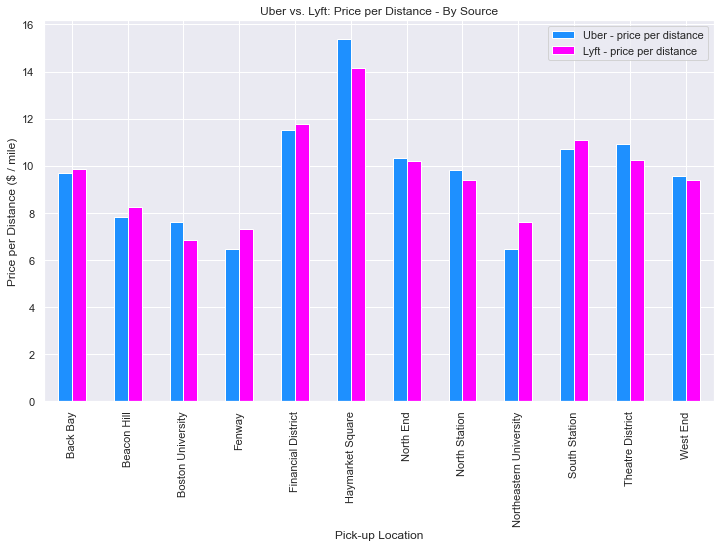

In [90]:
# Plot of Uber and Lyft prices per distance based on SOURCE (pick-up location)
df_source_both.plot(kind='bar', color=['dodgerblue', 'magenta'], title = 'Uber vs. Lyft: Price per Distance - By Source', xlabel = 'Pick-up Location', ylabel = 'Price per Distance ($ / mile)')


<AxesSubplot:title={'center':'Uber vs. Lyft: Price per Distance - By Destination'}, xlabel='Drop-off Location', ylabel='Price per Distance ($ / mile)'>

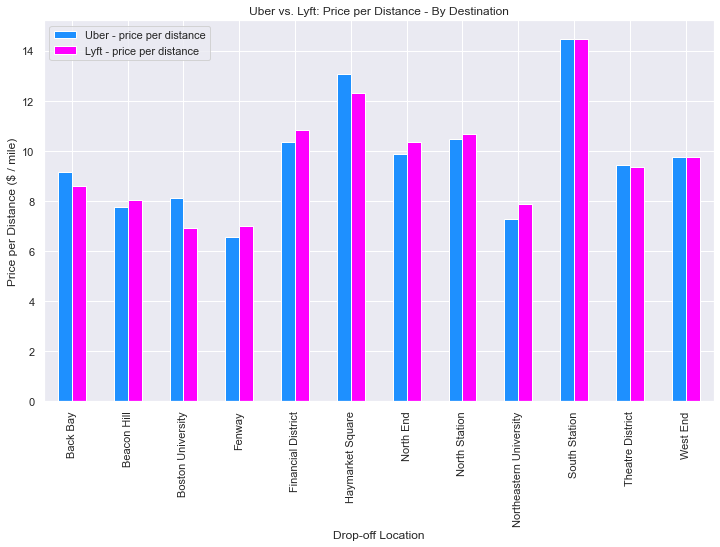

In [91]:
# Plot of Uber and Lyft prices per distance based on DESTINATION (drop-off location)
df_uber_dest = df_uber.groupby('destination').mean()[['price_per']].sort_values(by='destination')
df_lyft_dest = df_lyft.groupby('destination').mean()[['price_per']].sort_values(by='destination')
df_dest_both = pd.merge(df_uber_dest, df_lyft_dest, on='destination')
df_dest_both.columns = ['Uber - price per distance', 'Lyft - price per distance']
df_dest_both.plot(kind='bar', color=['dodgerblue', 'magenta'], title = 'Uber vs. Lyft: Price per Distance - By Destination', xlabel = 'Drop-off Location', ylabel = 'Price per Distance ($ / mile)')

In [ ]:
# Lyft-Source dataset to be plotted on geographic heatmap
df_lyft_source_plot = df_lyft.groupby(by='source').mean()[['price_per']].sort_values(by='source')
source_lst = ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District', 'Haymarket Square', 'North End', 'North Station', 'Northeastern University', 'South Station', 'Theatre District', 'West End']
df_lyft_source_plot['source'] = source_lst
df_lyft_source_plot.index = range(12)
df_lyft_source_plot


In [ ]:
# Uber-Source dataset to be plotted on geographic heatmap
df_uber_source_plot = df_uber.groupby(by='source').mean()[['price_per']].sort_values(by='source')
source_lst = ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District', 'Haymarket Square', 'North End', 'North Station', 'Northeastern University', 'South Station', 'Theatre District', 'West End']
df_uber_source_plot['source'] = source_lst
df_uber_source_plot.index = range(12)
df_uber_source_plot

In [ ]:
# Uber-Destination dataset to be plotted on geographic heatmap
df_uber_dest_plot = df_uber.groupby(by='destination').mean()[['price_per']].sort_values(by='destination')
dest_lst = ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District', 'Haymarket Square', 'North End', 'North Station', 'Northeastern University', 'South Station', 'Theatre District', 'West End']
df_uber_dest_plot['destination'] = dest_lst
df_uber_dest_plot.index = range(12)
df_uber_dest_plot

In [ ]:
tup = list(zip(df['latitude'], df['longitude']))
tup_to_lst = [list(ele) for ele in tup]
df['long_lat'] = tup_to_lst
df['long_lat'].astype(str).unique()

In [ ]:
df.loc[df['source']=='Haymarket Square', :]['longitude']

In [ ]:
df.loc[df['source']=='Haymarket Square', :]['latitude']

In [ ]:
df.loc[df['destination']=='Haymarket Square', :][['latitude', 'longitude']]

In [ ]:
df.loc[df['destination']=='Haymarket Square', :]['longitude']

In [ ]:
print(df['distance'].max())
print(df['distance'].min())

In [ ]:
df.groupby('cab_type').agg({'price_per': 'mean','price_per_surge_adjusted': 'mean'})

In [ ]:
df.columns

In [ ]:
df

In [ ]:
# Lyft-Destination dataset to be plotted on geographic heatmap
df_lyft_dest_plot = df_lyft.groupby(by='destination').mean()[['price_per']].sort_values(by='destination')
dest_lst = ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District', 'Haymarket Square', 'North End', 'North Station', 'Northeastern University', 'South Station', 'Theatre District', 'West End']
df_lyft_dest_plot['destination'] = source_lst
df_lyft_dest_plot.index = range(12)
df_lyft_dest_plot

In [ ]:
df

In [ ]:
long_lat_dict = {'Back Bay':[-71.081321, 42.351161], 'Beacon Hill':[-71.067274, 42.359170], 'Boston University':[-71.105131, 42.350198], 'Fenway':[-71.098505, 42.341953], 'Financial District':[-71.054488, 42.356806], 'Haymarket Square': [-71.0585457994822, 42.363916861671115], 'North End':[-71.054630, 42.365801], 'North Station':[-71.06170681508357,42.36619784699363], 'Northeastern University':[-71.08927013807684, 42.3400819338889], 'South Station':[-71.05507030159285, 42.352080255564914], 'Theatre District': [-71.064075, 42.352100], 'West End':[-71.065078, 42.364365]}


In [ ]:
df["B"] = df["A"].map(equiv)

In [ ]:
df['long_lat_source'] = df['source'].map(long_lat_dict)

In [ ]:
df['long_lat_destination'] = df[''].map(long_lat_dict)

In [ ]:
df['source'].unique()

In [ ]:
df['destination'].unique()